# This is a classification model
* has different classes of output but answer is only one decision

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

We use "fashion mnist dataset from keras where there is 60k grayscale image of 10 fashion catagory.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

Now we will take the data sets in a dataframe for both train and test dataset

In [4]:
(x_trainFull, y_trainFull), (x_test, y_test) = fashion_mnist.load_data()

Now we can show the image using matplotlib

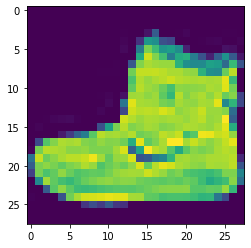

In [5]:
plt.imshow(x_trainFull[0])

In [6]:
y_trainFull[0]

9

In [7]:
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", " Sneaker", "Bag", "Ankle Boot"]

In [8]:
class_names[y_trainFull[0]]

'Ankle Boot'

In [9]:
x_trainFull[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

It represent the 28 * 28 matrix of 28 * 28 pixel image. where 0 represent black and 255 represent the white

## Data Normalization
Now we will transform the x_train's each 28 * 28 matrix somehow only contain 0 and 1. This is what data normalization

In [10]:
x_trainNormal = x_trainFull/255.0
x_testNormal = x_test/255.0

### Spit data into Train , Validation and Test datasets
Here 
* First 5k data is been stored for validation (For optimizing)
* Rest 55k data for train the data(For training model)
* Test dataset has 10k data(To test the model accuracy)

In [11]:
x_valid, x_train = x_trainNormal[:5000], x_trainNormal[5000:]
y_valid, y_train = y_trainFull[:5000], y_trainFull[5000:]
x_testCase = x_testNormal

In [12]:
x_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

# Now we will create the model

Now let us set random seeds which helps to find the same result every time

In [13]:
np.random.seed(42)
tf.random.set_seed(42)

Now we will using a sequential model here<br>
Also be noted here the 10 o/p is exclusive or each other. So it is a MULTICLASS CLASSIFICATION. Thus it has
* Softmax activation
* Hidden layer(Here 2 hidden layer with ReLU activation has been used)

In [14]:
# As we are using a sequential model
model = keras.models.Sequential()
# As our i/p is 28*28 2D matrix we will flatten the matrix into 1D array for easy calculation
model.add(keras.layers.Flatten(input_shape = [28,28]))
# Now we will add some hidden layers
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
# Now we will add the output layer
model.add(keras.layers.Dense(10, activation = "softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Now to see the NEURAL NETWORK we can use "pydot"

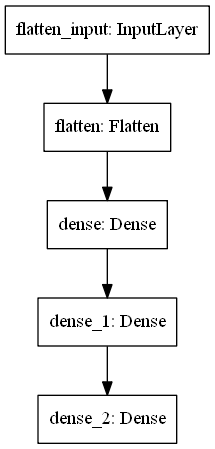

In [16]:
import pydot
keras.utils.plot_model(model)

In [17]:
#To see the weight and biases
weights, biases = model.layers[1].get_weights()

In [18]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

Here is 784 rows and 300 columns as there were 784 inputs after flatten the actaul input and 300 neurons in the hidden layer 1 which is the second layer of the model

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

There is 300 biases for the hidden layer 1 as there were 300 neurons

In [21]:
biases.shape

(300,)

# Now we will set up the learning process for the model

To do learning we will use the COMPILE method

In [22]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

Here 
* loss "sparse_categorical_crossentropy" is used as our input data is sparse or exclusive.
See also keras documentation for further
* sgd stands for Sophisticated Gradient Descent
* as here we are buiding classifier thus we have used accuracy and also be informed that metrics is a optional parameter

### Training model

In [23]:
model_history = model.fit(x_train, y_train, epochs = 75, validation_data = (x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/75
55000/55000 [==============================] - 4s 80us/sample - loss: 0.7226 - accuracy: 0.7641 - val_loss: 0.5073 - val_accuracy: 0.8320
Epoch 2/75
55000/55000 [==============================] - 4s 71us/sample - loss: 0.4844 - accuracy: 0.8323 - val_loss: 0.4538 - val_accuracy: 0.8488
Epoch 3/75
55000/55000 [==============================] - 4s 73us/sample - loss: 0.4414 - accuracy: 0.8463 - val_loss: 0.4378 - val_accuracy: 0.8498
Epoch 4/75
55000/55000 [==============================] - 4s 73us/sample - loss: 0.4129 - accuracy: 0.8547 - val_loss: 0.4164 - val_accuracy: 0.8556
Epoch 5/75
55000/55000 [==============================] - 4s 71us/sample - loss: 0.3927 - accuracy: 0.8617 - val_loss: 0.3809 - val_accuracy: 0.8652
Epoch 6/75
55000/55000 [==============================] - 4s 72us/sample - loss: 0.3771 - accuracy: 0.8665 - val_loss: 0.3728 - val_accuracy: 0.8680
Epoch 7/75
55000/55000 [==============================] -

In [24]:
model.history.params
# It gives a dictionary

{'batch_size': 32,
 'epochs': 75,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [25]:
model_history.history
# It gives a dictionary

{'loss': [0.722569646878676,
  0.48439070263775913,
  0.44139273505644366,
  0.4129385054046458,
  0.3926527421431108,
  0.3771403594493866,
  0.3627069265148856,
  0.3518205312479626,
  0.3420529502868652,
  0.3326711104132912,
  0.32407692904038865,
  0.31601437797112897,
  0.3073855296525088,
  0.3018176826693795,
  0.29529129893779754,
  0.28982838484590706,
  0.2833687421928753,
  0.27829956267747014,
  0.2728821515039964,
  0.26814697365760803,
  0.2633877638231624,
  0.257503629638932,
  0.2538207898248326,
  0.24917920290448448,
  0.2451915735764937,
  0.24078982855623418,
  0.2367717648690397,
  0.23215883191715586,
  0.22870411636287516,
  0.2256430769551884,
  0.2211449507507411,
  0.21905284497846256,
  0.2143549875963818,
  0.2106711592284116,
  0.20749313506971706,
  0.2047128077864647,
  0.20074264432516964,
  0.1992803159193559,
  0.19383234642202204,
  0.19270723598084666,
  0.18890735392137006,
  0.18571870632496748,
  0.18310914324467834,
  0.17984695345163346,
  0.1

Now to see different aspect of the model

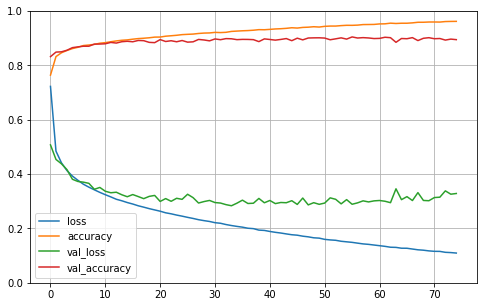

In [26]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Now we are going to evaluate performance and predict data for our model

Now we will evaluate our model using "evaluate()" method on our model object 

In [27]:
model.evaluate(x_testCase, y_test)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3753 - accuracy: 0.8824


[0.3752760881483555, 0.8824]

Now we will predict value from the model

In [28]:
# We have taken 3 data from "test dataset"
x_new = x_test[:3]

Here we predict two things
* The probability of each class
* The class itself

In [29]:
# Now predict the probability 
y_prob = model.predict(x_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
# Now predict the class ifself
y_pred = model.predict_classes(x_new)
y_pred

array([9, 2, 1], dtype=int64)

In [31]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

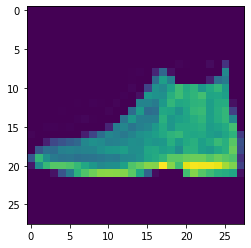

In [32]:
plt.imshow(x_test[0])

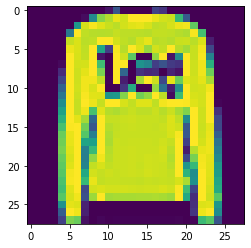

In [33]:
plt.imshow(x_test[1])

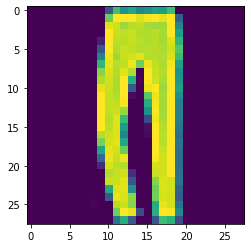

In [34]:
plt.imshow(x_test[2])